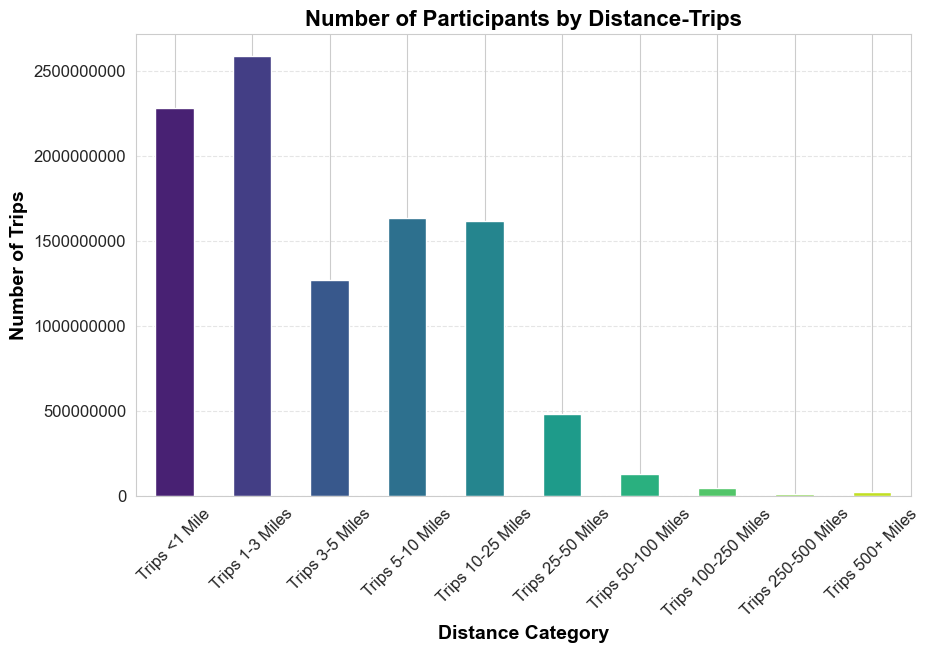

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Trips_Full_Data.csv")

# Aggregate the data by summing up the number of travelers for each distance range
distance_columns = [
   'Trips <1 Mile', 'Trips 1-3 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles', 
                   'Trips 25-50 Miles', 'Trips 50-100 Miles', 'Trips 100-250 Miles', 'Trips 250-500 Miles', 
                   'Trips 500+ Miles'
                    ]
total_travelers_by_distance = data[distance_columns].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", len(total_travelers_by_distance))

total_travelers_by_distance.plot(kind='bar', color=colors)
plt.title('Number of Participants by Distance-Trips', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Distance Category', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Number of Trips', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Set y-axis ticks to integers without scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


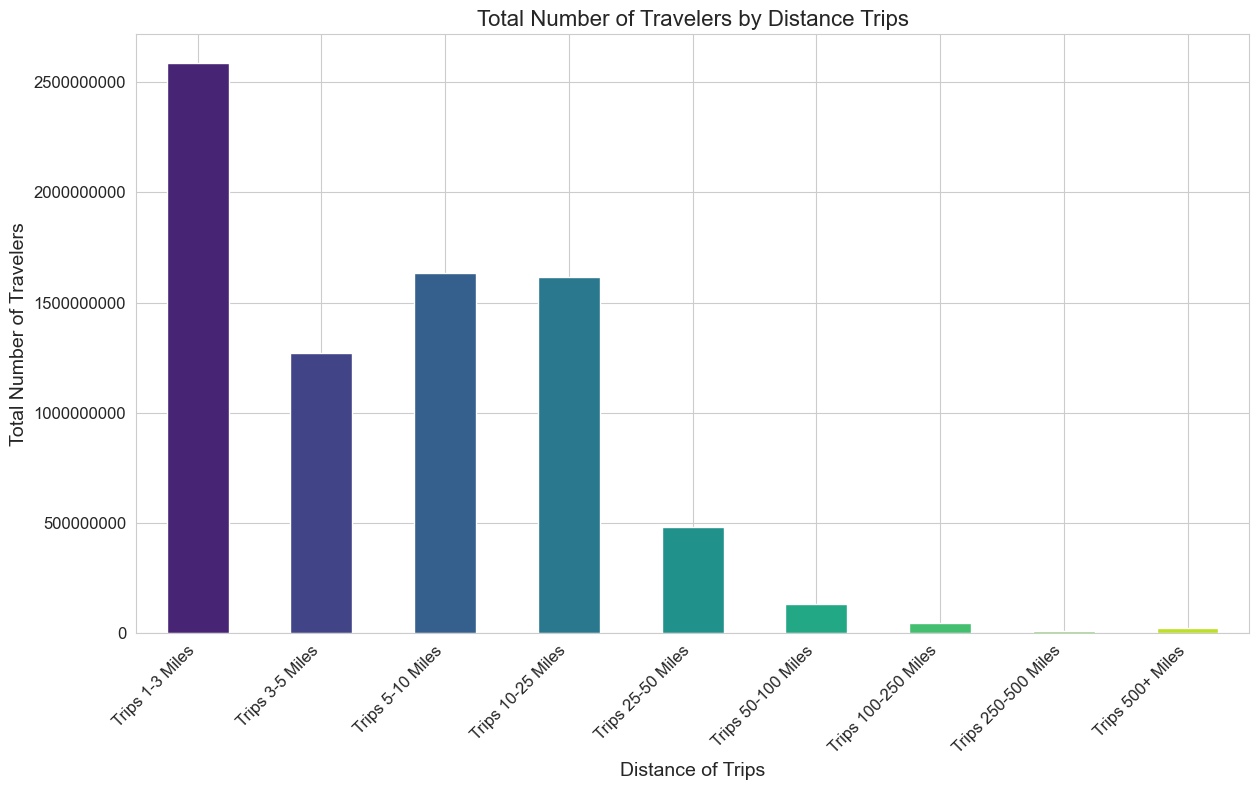

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the dataset
data = pd.read_csv("Trips_Full_Data.csv")

# Aggregate the data by summing up the number of travelers for each distance range
distance_columns = [
   'Trips 1-3 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles', 
                   'Trips 25-50 Miles', 'Trips 50-100 Miles', 'Trips 100-250 Miles', 'Trips 250-500 Miles', 
                   'Trips 500+ Miles'
                    ]
total_travelers_by_distance = data[distance_columns].sum()

# Plotting
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", len(total_travelers_by_distance))

total_travelers_by_distance.plot(kind='bar', color=colors)
plt.title('Number of Travelers by Distance Trips', fontsize=16)
plt.xlabel('Distance of Trips', fontsize=14)
plt.ylabel('Total Number of Travelers', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)



plt.tight_layout()
plt.savefig("travelers_by_distance.png", dpi=300)  # Save the figure as a high-resolution image
# Set y-axis ticks to integers without scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


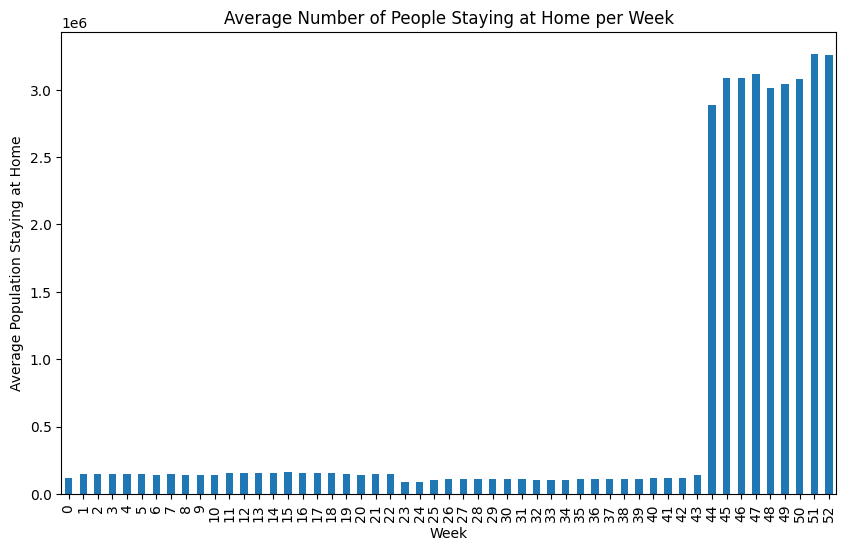

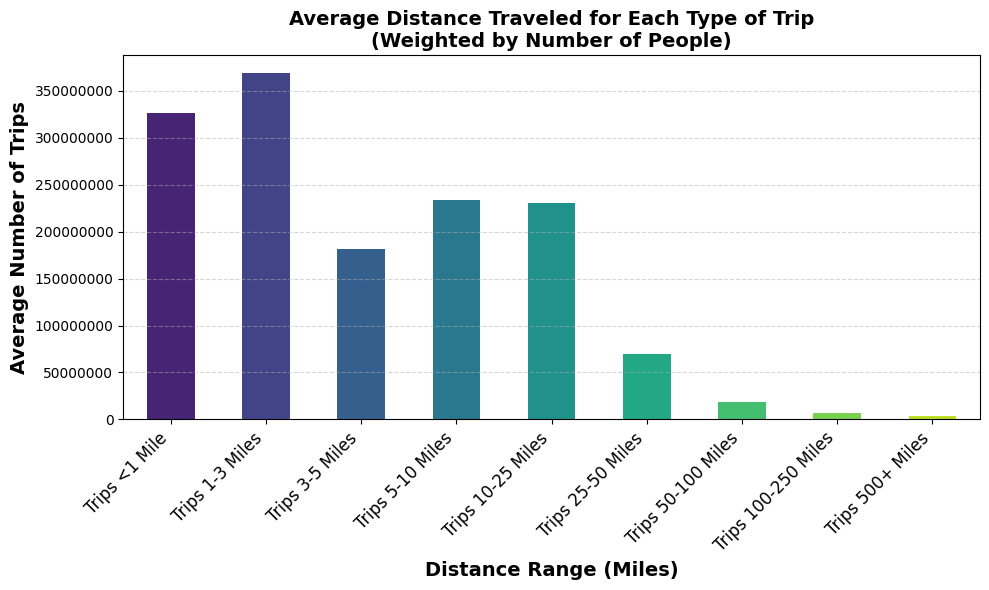

Time taken to complete the task:
- With 10 processors: 0.016525745391845703 seconds
- With 20 processors: 0.014567136764526367 seconds


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
import time
import seaborn as sns

# Load the datasets using Dask
trip_by_distance = pd.read_csv("Trips_by_Distance.csv")
trip_full_data = pd.read_csv("Trips_Full_Data.csv")

# Define the number of processors for parallel computing
num_processors = [10, 20]

# Dictionary to store time taken by each approach
time_taken_task_c = {}

# Apply parallel computing using Dask for Task C
for processors in num_processors:
    start_time_dask = time.time()
    avg_people_staying_at_home = trip_by_distance.groupby('Week')['Population Staying at Home'].mean()
    avg_distance_traveled = trip_full_data[['Trips <1 Mile', 'Trips 1-3 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles', 'Trips 25-50 Miles', 'Trips 50-100 Miles', 'Trips 100-250 Miles', 'Trips 500+ Miles']].mean()
    dask_time = time.time() - start_time_dask
    time_taken_task_c[processors] = dask_time


# Visualization - Average number of people staying at home per week
plt.figure(figsize=(10, 6))
avg_people_staying_at_home.plot(kind='bar', color='#1f77b4')
plt.title('Average Number of People Staying at Home per Week')
plt.xlabel('Week')
plt.ylabel('Average Population Staying at Home')
plt.show()

# Define a color palette
colors = sns.color_palette("viridis", len(avg_distance_traveled))

# Visualization - Bar plot for the average distance people travel when not staying at home
plt.figure(figsize=(10, 6))
avg_distance_traveled.plot(kind='bar', color=colors)
plt.title('Average Distance Traveled for Each Type of Trip\n(Weighted by Number of People)', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Distance Range (Miles)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Average Number of Trips', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right',fontsize=12, color='black')  # Rotate x-axis labels for better readability
# Set y-axis ticks to integers without scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print the time taken for Task C with different numbers of processors
print("Time taken to complete the task:")
for processors, time_taken in time_taken_task_c.items():
    print(f"- With {processors} processors: {time_taken} seconds")


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load datasets
df_full = pd.read_csv("Trips_Full_Data.csv")
df = pd.read_csv("Trips_by_Distance.csv")

# Define data types
dtypes_full = { 
    'Level': 'category', 'Date': 'datetime64[ns]', 'State FIPS': 'Int64', 'State Postal Code': 'string',
    'County FIPS': 'Int64', 'County Name': 'string', 'Population Staying at Home': 'Int64',
    'Population Not Staying at Home': 'Int64', 'Number of Trips': 'Int64', 'Number of Trips <1': 'Int64',
    'Number of Trips 1-3': 'Int64', 'Number of Trips 3-5': 'Int64', 'Number of Trips 5-10': 'Int64',
    'Number of Trips 10-25': 'Int64', 'Number of Trips 25-50': 'Int64', 'Number of Trips 50-100': 'Int64',
    'Number of Trips 100-250': 'Int64', 'Number of Trips 250-500': 'Int64', 'Number of Trips >=500': 'Int64',
    'Row ID': 'string', 'Week': 'Int64', 'Month': 'Int64'
}

# Fill null values and convert data types
df.fillna({ 
    'State FIPS': 0, 'County FIPS': 0, 'Population Staying at Home': 0, 'Population Not Staying at Home': 0,
    'Number of Trips': 0, 'Number of Trips <1': 0, 'Number of Trips 1-3': 0, 'Number of Trips 3-5': 0,
    'Number of Trips 5-10': 0, 'Number of Trips 10-25': 0, 'Number of Trips 25-50': 0, 'Number of Trips 50-100': 0,
    'Number of Trips 100-250': 0, 'Number of Trips 250-500': 0, 'Number of Trips >=500': 0, 'Row ID': 'NA'
}, inplace=True)
df = df.astype(dtypes_full)

# Convert 'Date' columns to datetime
df_full['Date'] = pd.to_datetime(df_full['Date'])
df['Date'] = pd.to_datetime(df['Date'])

# Merge the dataframes on 'Date' column
df_combined = pd.merge(df_full, df, on='Date', how='inner')

# Define the columns for predictors (X) and response variable (y)
x_columns = ['Trips 1-25 Miles', 'Trips 25-100 Miles']
y_column = 'Number of Trips 5-10'

# Convert predictor and response variables to float
X = df_combined[x_columns].astype(float)
y = df_combined[y_column].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
r_sq_linear = linear_model.score(X_test, y_test)
print("Linear Regression:")
print(f"Coefficient of determination (R^2): {r_sq_linear}")
print(f"Intercept: {linear_model.intercept_}")
print(f"Coefficients: {linear_model.coef_}")

# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
r_sq_poly = poly_model.score(X_poly_test, y_test)
print("\nPolynomial Regression:")
print(f"Coefficient of determination (R^2): {r_sq_poly}")

# Advanced Linear Regression With statsmodels
X_train_with_const = sm.add_constant(X_train)
stats_model = sm.OLS(y_train, X_train_with_const).fit()
print("\nStatsmodels Summary:")
print(stats_model.summary())
y_pred_test = stats_model.predict(sm.add_constant(X_test))
print("\nPredictions on Test Set:")
print(y_pred_test)


Linear Regression:
Coefficient of determination (R^2): 0.9994357684903016
Intercept: 407.55198506690795
Coefficients: [-0.04374874  1.37430889]

Polynomial Regression:
Coefficient of determination (R^2): 0.9992826378602032

Statsmodels Summary:
                             OLS Regression Results                             
Dep. Variable:     Number of Trips 5-10   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                 1.641e+07
Date:                  Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                          18:00:16   Log-Likelihood:            -2.3164e+05
No. Observations:                 17886   AIC:                         4.633e+05
Df Residuals:                     17883   BIC:                         4.633e+05
Df Model:                             2                                         
Covariance Type:          

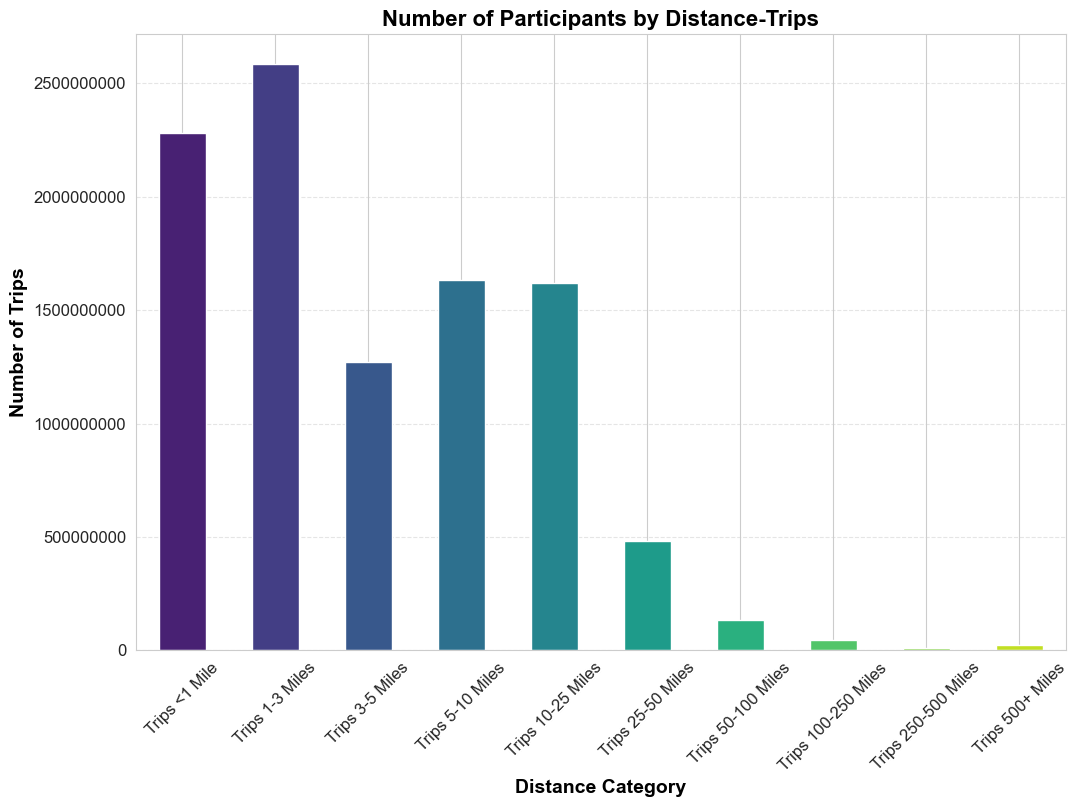

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("Trips_Full_Data.csv")

# Summing up the number of trips for each distance category
summed_trips = df[['Trips <1 Mile', 'Trips 1-3 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles', 
                   'Trips 25-50 Miles', 'Trips 50-100 Miles', 'Trips 100-250 Miles', 'Trips 250-500 Miles', 
                   'Trips 500+ Miles']].sum()

# Define a color palette
colors = sns.color_palette("viridis", len(summed_trips))

# Plotting
plt.figure(figsize=(12, 8))
bars = summed_trips.plot(kind='bar', color=colors)

plt.title('Number of Participants by Distance-Trips', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Distance Category', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Number of Trips', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)



# Set y-axis ticks to integers without scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()
